In [1]:
library(tidyverse)

# Custom package
library(rutils)

-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.0 --

v ggplot2 3.3.3     v purrr   0.3.4
v tibble  3.0.6     v dplyr   1.0.4
v tidyr   1.1.2     v stringr 1.4.0
v readr   1.4.0     v forcats 0.5.1

-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()



In [2]:
# Define constants
dirs <- rutils::get_dev_directories(dev_paths_file = "../dev_paths.txt")
projects <- c("TCGA-CESC", "TCGA-UCS", "TCGA-UCEC", "TCGA-OV")
unified_dsets <- c("unified_cervical_data", "unified_uterine_data", "unified_uterine_endometrial_data")

In [3]:
dset_idx <- 3

In [4]:
cph_df <- read_tsv(paste0(dirs$analysis_dir, "/model_opt/", unified_dsets[dset_idx], "_en_cph_fit_data.tsv")) %>%
    mutate(log_lambda = log(lambda))


-- Column specification ------------------------------------------------------------------------------------------------
cols(
  cvm = col_double(),
  lambda = col_double(),
  cvlow = col_double(),
  cvup = col_double(),
  nonzero = col_double(),
  kept_idx = col_logical(),
  best_idx = col_logical()
)




In [5]:
head(cph_df)

cvm,lambda,cvlow,cvup,nonzero,kept_idx,best_idx,log_lambda
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<lgl>,<dbl>
0.5,1.0000000,0.5,0.5,0,FALSE,FALSE,0.000
0.5,0.9950125,0.5,0.5,0,FALSE,FALSE,-0.005
0.5,0.9900498,0.5,0.5,0,FALSE,FALSE,-0.010
0.5,0.9851119,0.5,0.5,0,FALSE,FALSE,-0.015
0.5,0.9801987,0.5,0.5,0,FALSE,FALSE,-0.020
0.5,0.9753099,0.5,0.5,0,FALSE,FALSE,-0.025


In [6]:
every_nth <- function(x, n) {
    x[seq(1, length(x), n)]
}

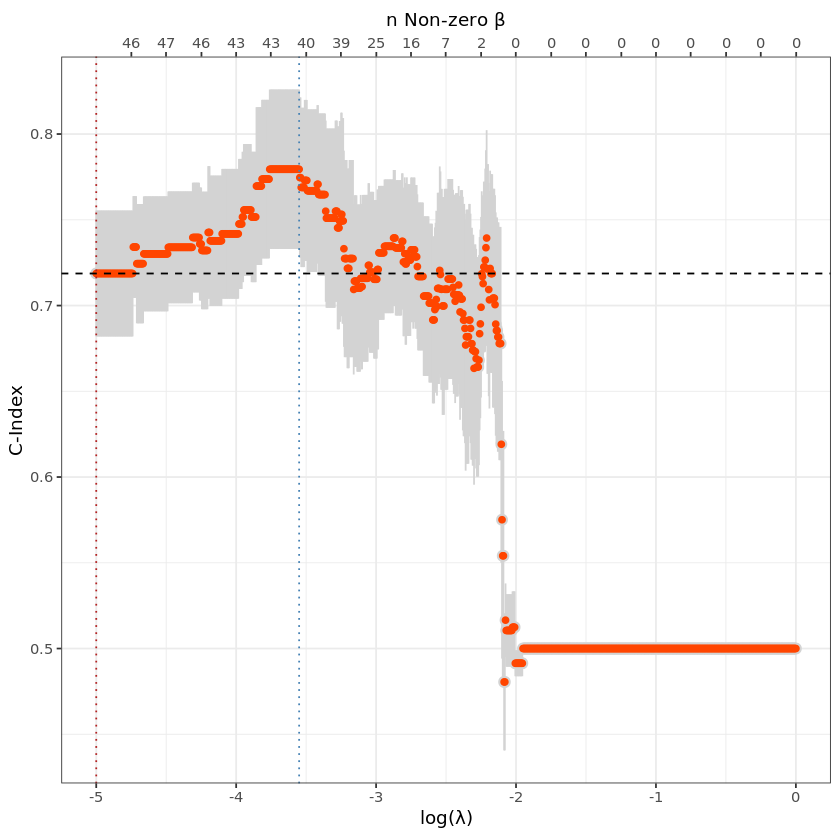

In [7]:
cph_best_lambda <- cph_df %>% filter(best_idx == TRUE) %>% pull(lambda)
cph_kept_lambda <- cph_df %>% filter(kept_idx == TRUE) %>% pull(lambda)
cph_kept_cvm <- cph_df %>% filter(kept_idx == TRUE) %>% pull(cvm)
cph_sec_x_breaks <- every_nth(cph_df$log_lambda, nrow(cph_df) / 20)
cph_sec_x_labs <- every_nth(cph_df$nonzero, nrow(cph_df)/ 20)

ggplot(data = cph_df, aes(x = log_lambda, y = cvm)) +
    geom_pointrange(aes(ymin = cvlow, ymax = cvup), color = "lightgray") +
    geom_point(color = "orangered") +
    geom_vline(xintercept = log(cph_best_lambda), linetype = 3, color = "steelblue") +
    geom_vline(xintercept = log(cph_kept_lambda), linetype = 3, color = "firebrick") +
    geom_hline(yintercept = cph_kept_cvm, linetype = 2, color = "black") +
    scale_x_continuous(sec.axis = dup_axis(
        name = bquote("n Non-zero "*beta),
        breaks = cph_sec_x_breaks,
        labels = cph_sec_x_labs)
    ) +
    labs(x = bquote("log("*lambda*")"), y = "C-Index") +
    theme_bw()